In [1]:
import pickle
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

In [2]:
directory = '/mnt/home/jbielecki1/NEMA/cut_parts4/'
modelFileName = 'ADA/adaEstimators1000Depth6'
max_depth = 2

In [3]:
model = pickle.load(open(directory + modelFileName, 'rb'))

In [4]:
X_test = pickle.load(open(directory + 'xTest', 'rb'))
y_test = pickle.load(open(directory + 'yTest', 'rb'))

In [5]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [6]:
y_pred = y_pred_prob > 0.5

In [7]:
class_test = y_test[["class"]].values
y_test = y_test[['newClass']].values

In [8]:
print("Accuracy: " + str(accuracy_score(y_pred, np.array(y_test))*100) + "%")

Accuracy: 73.54728731874931%


In [8]:
X_test_class_1 = X_test[class_test == 1]
X_test_class_2 = X_test[class_test == 2]
X_test_class_3 = X_test[class_test == 3]
X_test_class_4 = X_test[class_test == 4]
X_test_pred_1 = X_test[y_pred == 1]
X_test_pred_0 = X_test[y_pred == 0]

In [10]:
print("Percentage of 1 class probes: " + str(round(len(X_test_class_1)/len(X_test)*100,2))+ "%")
print("Percentage of 2 class probes: " + str(round(len(X_test_class_2)/len(X_test)*100,2))+ "%")
print("Percentage of 3 class probes: " + str(round(len(X_test_class_3)/len(X_test)*100,2))+ "%")
print("Percentage of 4 class probes: " + str(round(len(X_test_class_4)/len(X_test)*100,2))+ "%")

Percentage of 1 class probes: 67.58%
Percentage of 2 class probes: 25.14%
Percentage of 3 class probes: 4.44%
Percentage of 4 class probes: 2.84%


In [11]:
def plotFeatureImportances(features, importances, modelName):
    y_pos = np.arange(features.size)
    plt.clf()
    indexes = np.argsort(importances)
    plt.title("Feature importances - " + modelName)
    plt.barh(y_pos, np.sort(importances))
    plt.yticks(y_pos, features[indexes])
    plt.xlabel('F score')
    plt.ylabel("Feature")
    plt.show()

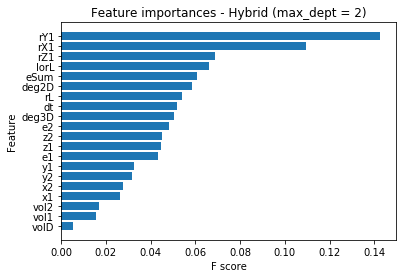

In [13]:
plotFeatureImportances(X_test.columns, model.feature_importances_, 'Hybrid (max_dept = ' + str(max_depth) + ')')

In [9]:
pPsOrginalPositive = X_test[y_test > 0]
pPsOrginalNegative = X_test[y_test == 0]
pPsPredictedPositive = X_test[y_pred]
pPsPredictedNegative = X_test[y_pred == 0]

In [10]:
FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

In [12]:
X = 8000000
F_ALL = 0.7082
T_ALL = 0.2918
TNR_CUT = 0.8031
TPR_CUT = 0.9948
TP_H = TP
FP_H = FP
TN_CUT = TNR_CUT * F_ALL * X
FN_CUT = (1.0 - TPR_CUT) * T_ALL * X
TN_H = TN + TN_CUT
FN_H = FN + FN_CUT

In [13]:
print(str(len(X_test)))
print(str((TN_CUT + FN_CUT)))
print(str(F_ALL*8000000*0.1968 + TPR_CUT*T_ALL*8000000))

3435754
4562182.240000001
3437251.2


In [14]:
print("TP_H: " + str(TP_H))
print("FP_H: " + str(FP_H))
print("TN_CUT: " + str(TN_CUT))
print("FN_CUT: " + str(FN_CUT))
print("TN_H: " + str(TN_H))
print("FN_H: " + str(FN_H))
print("TN_CUT + FN_CUT: " + str(TN_CUT + FN_CUT))

TP_H: 2230127
FP_H: 815730
TN_CUT: 4550043.360000001
FN_CUT: 12138.87999999996
TN_H: 4847672.360000001
FN_H: 104406.87999999996
TN_CUT + FN_CUT: 4562182.240000001


In [15]:
ACC_H = (TP_H + TN_H)/(TP_H + FP_H + TN_H + FN_H) # accuracy
TPR_H = TP_H/(TP_H + FN_H) # recall
TNR_H = TN_H/(TN_H + FP_H) # selectivity
PPV_H = TP_H/(TP_H + FP_H) # precision
FPR_H = FP_H/(FP_H + TN_H) # background acceptance

print("Hybrid Accuracy: " + str(ACC_H*100) + "%")
print("Hybrid Recall: " + str(TPR_H*100) + "%")
print("Hybrid Selectivity: " + str(TNR_H*100) + "%")
print("Hybrid Precision: " + str(PPV_H*100) + "%")
print("Hybrid Backgroung acceptance: " + str(FPR_H*100) + "%")
print(str(TP_H + FP_H + TN_H + FN_H))

Hybrid Accuracy: 88.49532113799398%
Hybrid Recall: 95.52772050581679%
Hybrid Selectivity: 85.59646749167227%
Hybrid Precision: 73.21837499265396%
Hybrid Backgroung acceptance: 14.403532508327729%
7997936.240000001


In [16]:
X_test_class_1 = X_test[class_test == 1]
X_test_class_2 = X_test[class_test == 2]
X_test_class_3 = X_test[class_test == 3]
X_test_class_4 = X_test[class_test == 4]
X_test_pred_1 = X_test[y_pred == 1]
X_test_pred_0 = X_test[y_pred == 0]

In [17]:
Class1 = len(X_test_class_1)
Class2 = len(X_test_class_2)
Class3 = len(X_test_class_3)
Class4 = len(X_test_class_4)
Class1P = len(pd.merge(pPsPredictedPositive,X_test_class_1, how='inner'))
Class2P = len(pd.merge(pPsPredictedPositive,X_test_class_2, how='inner'))
Class3P = len(pd.merge(pPsPredictedPositive,X_test_class_3, how='inner'))
Class4P = len(pd.merge(pPsPredictedPositive,X_test_class_4, how='inner'))
Class1N = len(pd.merge(pPsPredictedNegative,X_test_class_1, how='inner'))
Class2N = len(pd.merge(pPsPredictedNegative,X_test_class_2, how='inner'))
Class3N = len(pd.merge(pPsPredictedNegative,X_test_class_3, how='inner'))
Class4N = len(pd.merge(pPsPredictedNegative,X_test_class_4, how='inner'))

In [20]:
ACC = (TP + TN)/len(X_test) # accuracy
TPR = TP/(TP + FN) # recall
TNR = TN/(TN + FP) # selectivity
PPV = TP/(TP + FP) # precision
FPR = FP/(FP + TN) # background acceptance

print("True events (starting point of accuracy): " + str(len(y_test[y_test == 1])/len(y_test)*100.0) + "%")
print("Accuracy: " + str(ACC*100) + "%")
print("Recall: " + str(TPR*100) + "%")
print("Selectivity: " + str(TNR*100) + "%")
print("Precision: " + str(PPV*100) + "%")
print("Backgroung acceptance: " + str(FPR*100) + "%")

True events (starting point of accuracy): 67.58180660150524%
Accuracy: 73.54728731874931%
Recall: 96.01085900919294%
Selectivity: 26.717757403208157%
Precision: 73.19938139653411%
Backgroung acceptance: 73.28224259679185%


In [19]:
Class1ACC = (Class1P)/(Class1P + Class1N)*100.0
Class2ACC = (Class2N)/(Class2P + Class2N)*100.0
Class3ACC = (Class3N)/(Class3P + Class3N)*100.0
Class4ACC = (Class4N)/(Class4P + Class4N)*100.0

print("Class 1 accuracy: " + str(Class1ACC) + "%")
print("Class 2 accuracy: " + str(Class2ACC) + "%")
print("Class 3 accuracy: " + str(Class3ACC) + "%")
print("Class 4 accuracy: " + str(Class4ACC) + "%")

Class 1 accuracy: 96.01085900919294%
Class 2 accuracy: 28.585720880467996%
Class 3 accuracy: 10.013646622460941%
Class 4 accuracy: 36.27152435444006%
